In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [10]:
with open('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'Age': np.float64})
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [3]:
cols = {}
for col in df.columns:
    cols[col] = col.title()
df = df.rename(columns=cols)

In [4]:
df['embarked'] = df.Embarked.fillna('S')
df['Age'] = df.Age.fillna(df.Age.median())

In [5]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_binned'] = pd.cut(df.Age, bins, right=True, include_lowest=False)
# child variable
df['Child'] = (df.Age < 16).astype(int)
surv = df[df.Survived == 1]

Text(0, 0.5, '')

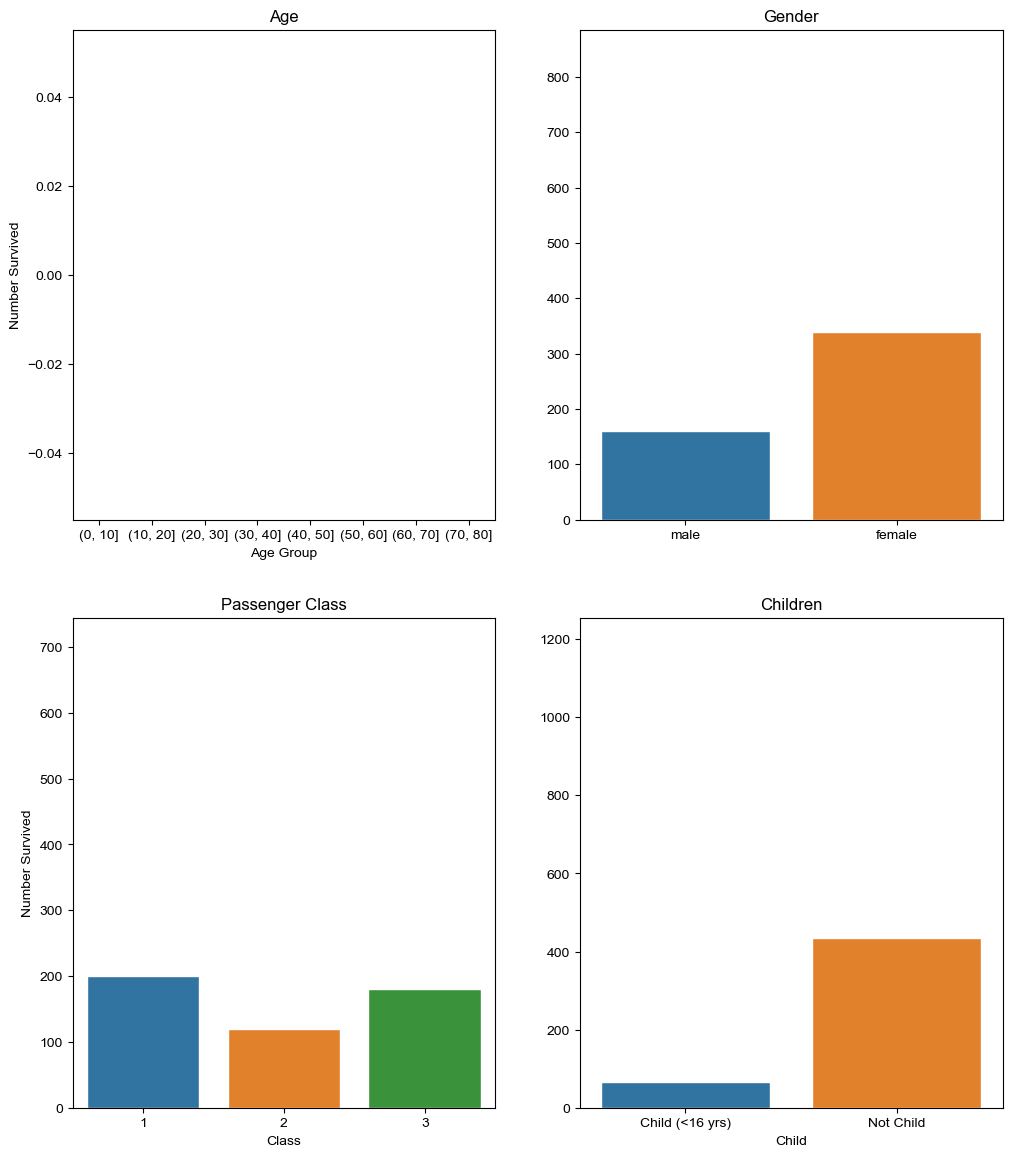

In [6]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))

sns.set_style('dark')
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

sns.countplot(x='age_binned', color='white', ax=ax1, data=df, order=order)
sns.countplot(x='age_binned', ax=ax1, data=surv, order=order)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')


sns.set_style('dark')
sns.countplot(x='Sex', color='white', ax=ax2, data=df, order=['male','female'])
sns.countplot(x='Sex', ax=ax2, data=surv,  order=['male','female'])
plt.ylabel('Survived')
ax2.set_xlabel('')
ax2.set_title('Gender')
ax2.set_ylabel('')

sns.countplot(x='Pclass', color='white', ax=ax3, data=df,  order=[1, 2, 3])
sns.countplot(x='Pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('Class')


sns.countplot(x='Child', color='white', ax=ax4, data=df, order=[1,0])
sns.countplot(x='Child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      1309 non-null   float64 
 1   Survived    1309 non-null   float64 
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1310 non-null   float64 
 5   Sibsp       1309 non-null   float64 
 6   Parch       1309 non-null   float64 
 7   Ticket      1309 non-null   object  
 8   Fare        1308 non-null   float64 
 9   Cabin       295 non-null    object  
 10  Embarked    1307 non-null   object  
 11  Boat        486 non-null    object  
 12  Body        121 non-null    float64 
 13  Home.Dest   745 non-null    object  
 14  embarked    1310 non-null   object  
 15  age_binned  1310 non-null   category
 16  Child       1310 non-null   int64   
dtypes: category(1), float64(7), int64(1), object(8)
memory usage: 165.6+ KB


Text(0.5, 0, '')

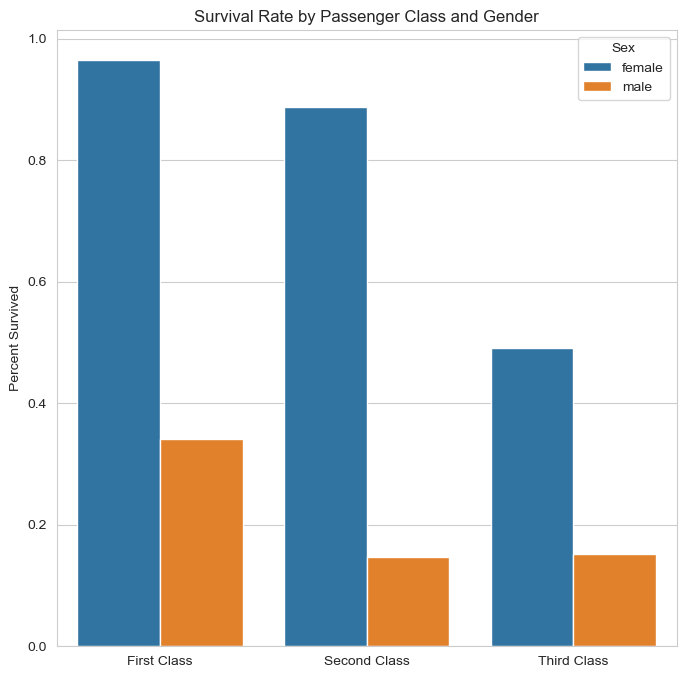

In [8]:
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ax=axis, ci=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')